In [7]:
import pandas as pd

import seaborn as sns

import numpy as np

import matplotlib.pyplot as plt

import warnings

from sklearn.preprocessing import StandardScaler

from sklearn.cluster import KMeans

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score, classification_report, silhouette_score

In [12]:
dataset = pd.read_csv("C:/Users/afsal/Desktop/Internship/Vine/WineQT.csv")

In [13]:
dataset.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [14]:
dataset = dataset.drop(['Id','density'] , axis='columns')

In [15]:
dataset

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...
1138,6.3,0.510,0.13,2.3,0.076,29.0,40.0,3.42,0.75,11.0,6
1139,6.8,0.620,0.08,1.9,0.068,28.0,38.0,3.42,0.82,9.5,6
1140,6.2,0.600,0.08,2.0,0.090,32.0,44.0,3.45,0.58,10.5,5
1141,5.9,0.550,0.10,2.2,0.062,39.0,51.0,3.52,0.76,11.2,6


In [16]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   pH                    1143 non-null   float64
 8   sulphates             1143 non-null   float64
 9   alcohol               1143 non-null   float64
 10  quality               1143 non-null   int64  
dtypes: float64(10), int64(1)
memory usage: 98.4 KB


In [17]:
dataset.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

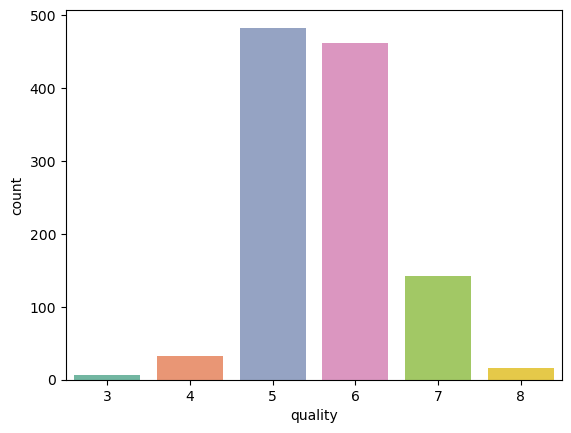

In [18]:
sns.countplot(x = dataset['quality'], palette= 'Set2');

In [19]:
dataset.groupby('quality').size()

quality
3      6
4     33
5    483
6    462
7    143
8     16
dtype: int64

In [24]:
from sklearn.utils import resample

df_three = dataset[(dataset['quality']== 3)]  
df_four = dataset[(dataset['quality']== 4)]
df_five=dataset[(dataset['quality']==5)]
df_six = dataset[(dataset['quality']== 6)]
df_seven = dataset[(dataset['quality']== 7)]
df_eight = dataset[(dataset['quality']== 8)]
# upsample minority class
df_three_upsampled = resample(df_three, 
                                 replace=True,    # sample with replacement
                                 n_samples= 483, # to match majority class
                                 random_state=42) 
df_four_upsampled = resample(df_four, 
                                 replace=True,    # sample with replacement
                                 n_samples= 483, # to match majority class
                                 random_state=42)# reproducible results
df_six_upsampled = resample(df_six, 
                                 replace=True,    # sample with replacement
                                 n_samples= 483, # to match majority class
                                 random_state=42)
df_seven_upsampled = resample(df_seven, 
                                 replace=True,    # sample with replacement
                                 n_samples= 483, # to match majority class
                                 random_state=42)
df_eight_upsampled = resample(df_eight, 
                                 replace=True,    # sample with replacement
                                 n_samples= 483, # to match majority class
                                 random_state=42)

ds = pd.concat([df_three_upsampled,df_four_upsampled,df_five,df_six_upsampled,df_seven_upsampled,df_eight_upsampled])

<Axes: xlabel='quality', ylabel='count'>

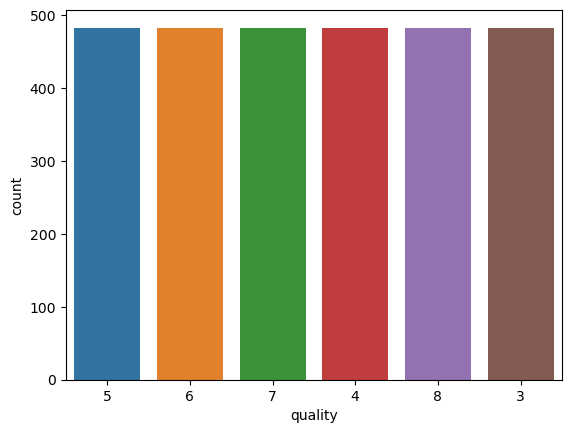

In [25]:
sns.countplot(x = 'quality', data=ds, order = dataset['quality'].value_counts().index)

In [26]:
dataset

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...
1138,6.3,0.510,0.13,2.3,0.076,29.0,40.0,3.42,0.75,11.0,6
1139,6.8,0.620,0.08,1.9,0.068,28.0,38.0,3.42,0.82,9.5,6
1140,6.2,0.600,0.08,2.0,0.090,32.0,44.0,3.45,0.58,10.5,5
1141,5.9,0.550,0.10,2.2,0.062,39.0,51.0,3.52,0.76,11.2,6


In [54]:
x = ds.iloc[:,0:10].values
y = ds.iloc[:,-1].values

In [55]:
x

array([[ 7.3  ,  0.98 ,  0.05 , ...,  3.31 ,  0.55 ,  9.7  ],
       [ 7.1  ,  0.875,  0.05 , ...,  3.4  ,  0.52 , 10.2  ],
       [ 7.6  ,  1.58 ,  0.   , ...,  3.5  ,  0.4  , 10.9  ],
       ...,
       [ 7.9  ,  0.54 ,  0.34 , ...,  3.2  ,  0.72 , 13.1  ],
       [ 7.2  ,  0.33 ,  0.33 , ...,  3.23 ,  1.1  , 10.   ],
       [ 8.6  ,  0.42 ,  0.39 , ...,  3.35 ,  0.69 , 11.7  ]])

In [56]:
y

array([3, 3, 3, ..., 8, 8, 8], dtype=int64)

In [57]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 1)

In [58]:
print("x_train: ",x_train.shape)
print("y_train: ",y_train.shape)
print("x_test: ",x_test.shape)
print("y_test: ",y_test.shape)

x_train:  (2028, 10)
y_train:  (2028,)
x_test:  (870, 10)
y_test:  (870,)


# logic regression

In [59]:
model_lr = LogisticRegression(max_iter = 600)

In [60]:
model_lr.fit(x_train, y_train)

C:\Users\afsal\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=600)

In [61]:
y_pred_lr = model_lr.predict(x_test)

In [62]:

print("Accuracy : ", accuracy_score(y_test, y_pred_lr))

Accuracy :  0.5333333333333333


# KNN

In [63]:

from sklearn.neighbors import KNeighborsClassifier

In [64]:
model_knn = KNeighborsClassifier()

In [65]:
model_knn.fit(x_train,y_train)

KNeighborsClassifier()

In [66]:
y_pred_knn = model_knn.predict(x_test)

In [67]:
print("Accuracy : ", accuracy_score(y_test, y_pred_knn))

Accuracy :  0.7850574712643679


# decision tree

In [68]:
from sklearn.tree import DecisionTreeClassifier

In [69]:
model_dt = DecisionTreeClassifier()

In [70]:
model_dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [71]:
y_pred_dt = model_dt.predict(x_test)

In [72]:
print("Accuracy : ", accuracy_score(y_test, y_pred_dt))

Accuracy :  0.9011494252873563


# naive bayes

In [73]:
from sklearn.naive_bayes import GaussianNB

In [74]:
model_nb = GaussianNB()

In [75]:
model_nb.fit(x_train,y_train)

GaussianNB()

In [76]:
y_pred_nb = model_nb.predict(x_test)

In [77]:
print("Accuracy : ", accuracy_score(y_test, y_pred_nb))

Accuracy :  0.5333333333333333


# svm

In [78]:
from sklearn.svm import SVC

In [79]:
model_svc = SVC(gamma='auto')

In [80]:
model_svc.fit(x_train,y_train)

SVC(gamma='auto')

In [81]:
y_pred_svc = model_nb.predict(x_test)

In [82]:
print("Accuracy : ", accuracy_score(y_test, y_pred_svc))

Accuracy :  0.5333333333333333


In [83]:
from sklearn.ensemble import RandomForestClassifier

In [84]:
model_rf = RandomForestClassifier(n_estimators = 30, criterion = 'entropy', random_state = 0)

In [85]:
model_rf.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=30, random_state=0)

In [86]:

y_pred_rf = model_nb.predict(x_test)

In [87]:
print("Accuracy : ", accuracy_score(y_test, y_pred_svc))

Accuracy :  0.5333333333333333


# prediction

In [88]:
ds

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,pH,sulphates,alcohol,quality
1046,7.3,0.980,0.05,2.1,0.061,20.0,49.0,3.31,0.55,9.7,3
1055,7.1,0.875,0.05,5.7,0.082,3.0,14.0,3.40,0.52,10.2,3
922,7.6,1.580,0.00,2.1,0.137,5.0,9.0,3.50,0.40,10.9,3
1055,7.1,0.875,0.05,5.7,0.082,3.0,14.0,3.40,0.52,10.2,3
1055,7.1,0.875,0.05,5.7,0.082,3.0,14.0,3.40,0.52,10.2,3
...,...,...,...,...,...,...,...,...,...,...,...
190,7.9,0.350,0.46,3.6,0.078,15.0,37.0,3.35,0.86,12.8,8
793,7.9,0.540,0.34,2.5,0.076,8.0,17.0,3.20,0.72,13.1,8
793,7.9,0.540,0.34,2.5,0.076,8.0,17.0,3.20,0.72,13.1,8
996,7.2,0.330,0.33,1.7,0.061,3.0,13.0,3.23,1.10,10.0,8


In [90]:
Xnew = [[7.1,0.9,0.05,2.1,0.06,20.0,49.0,3.1,0.5,9.7]]

ynew = model_dt.predict(Xnew)

print(ynew)

[3]


In [91]:
y_test

array([7, 5, 6, 3, 8, 6, 5, 7, 8, 4, 8, 3, 6, 3, 4, 8, 7, 6, 8, 7, 6, 6,
       4, 8, 8, 3, 4, 4, 3, 3, 4, 3, 3, 8, 4, 5, 8, 6, 7, 8, 4, 3, 8, 6,
       5, 6, 6, 4, 7, 7, 6, 8, 3, 5, 7, 5, 8, 7, 6, 6, 6, 6, 5, 8, 7, 5,
       5, 6, 7, 3, 6, 8, 8, 5, 3, 6, 6, 3, 4, 7, 3, 6, 4, 3, 6, 7, 3, 4,
       8, 7, 5, 7, 3, 3, 5, 6, 5, 5, 7, 6, 4, 7, 5, 5, 4, 6, 4, 8, 3, 6,
       5, 6, 6, 8, 3, 4, 8, 3, 7, 7, 7, 4, 7, 5, 3, 4, 8, 6, 7, 7, 7, 8,
       8, 4, 7, 5, 5, 6, 7, 3, 7, 6, 6, 7, 4, 7, 5, 6, 4, 6, 4, 4, 6, 4,
       8, 4, 5, 7, 8, 5, 7, 4, 5, 8, 5, 7, 4, 5, 4, 7, 8, 5, 5, 5, 8, 3,
       3, 3, 7, 3, 8, 7, 8, 3, 8, 8, 6, 8, 5, 8, 6, 8, 7, 3, 4, 5, 5, 3,
       8, 7, 8, 6, 6, 5, 3, 8, 8, 3, 7, 7, 5, 7, 4, 5, 4, 8, 3, 5, 6, 4,
       4, 6, 8, 7, 7, 4, 8, 7, 3, 5, 3, 3, 5, 3, 5, 7, 3, 8, 3, 8, 3, 4,
       5, 8, 4, 8, 6, 7, 3, 5, 5, 6, 4, 3, 8, 5, 6, 6, 4, 4, 6, 6, 3, 3,
       5, 6, 3, 7, 5, 8, 4, 3, 8, 6, 8, 3, 3, 7, 7, 4, 8, 7, 7, 4, 4, 6,
       4, 8, 6, 3, 8, 4, 5, 3, 5, 3, 5, 6, 5, 5, 8,

In [92]:
y_pred_dt

array([7, 6, 3, 3, 8, 6, 5, 7, 8, 4, 8, 3, 5, 3, 4, 8, 7, 4, 8, 7, 4, 6,
       4, 8, 8, 3, 4, 4, 3, 3, 4, 3, 3, 8, 4, 6, 8, 6, 7, 8, 4, 3, 8, 5,
       6, 5, 5, 4, 7, 7, 6, 8, 3, 5, 7, 5, 8, 7, 6, 6, 7, 6, 6, 8, 7, 5,
       6, 5, 7, 3, 6, 8, 8, 5, 3, 5, 6, 3, 4, 7, 3, 6, 4, 3, 6, 7, 3, 4,
       8, 7, 4, 7, 3, 3, 5, 6, 5, 5, 7, 6, 4, 7, 6, 6, 4, 6, 4, 8, 3, 5,
       6, 6, 5, 8, 3, 4, 8, 3, 7, 7, 7, 4, 7, 6, 3, 4, 8, 6, 7, 7, 7, 8,
       8, 4, 7, 6, 5, 5, 7, 3, 7, 6, 6, 7, 4, 7, 5, 6, 4, 6, 4, 4, 6, 4,
       8, 4, 5, 7, 8, 5, 7, 4, 5, 8, 5, 7, 4, 5, 4, 7, 8, 5, 5, 5, 8, 3,
       3, 3, 7, 3, 8, 7, 8, 3, 8, 8, 7, 8, 5, 8, 6, 8, 7, 3, 4, 5, 6, 3,
       8, 7, 8, 6, 6, 5, 3, 8, 8, 3, 7, 7, 5, 7, 4, 6, 4, 8, 3, 5, 7, 4,
       4, 6, 8, 7, 7, 4, 8, 7, 3, 5, 3, 3, 5, 3, 5, 7, 3, 8, 3, 8, 3, 4,
       5, 8, 4, 8, 6, 7, 3, 5, 5, 6, 4, 3, 8, 6, 5, 6, 4, 4, 6, 6, 3, 3,
       6, 6, 3, 7, 5, 8, 4, 3, 8, 6, 8, 3, 3, 7, 7, 4, 8, 7, 7, 4, 4, 6,
       4, 8, 6, 3, 8, 4, 5, 3, 5, 3, 5, 6, 5, 5, 8,